# Notes

These are a set of plots with code for gaining some intuition of Andrew Larkoski's notes from the 2018 Summer School 
http://www.physics.smu.edu/olness/ftp/misc2/cteq/2018/LARKOSKI/1709.06195.pdf


In [1]:
import math 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 150
%matplotlib inline

# constants
a_s = 1 # between 0.1 and 0.5 probably better, but the linear scale plots look better at a_s = 1  
c_f = 4.0/3
c_a = 3

Here we are going to consider the case of a gluon being emitted by a parton.
<img src="process_eg_m2.png" alt="Drawing" style="width: 400px;"/>

We first reparametrize with $z$ and $\theta$. 

$$ P(z,\theta^2)dz d\theta^2 
= \frac{\alpha_s C_F}{\pi}\frac{dz}{z} \frac{d\theta^2}{\theta} 
= \frac{\alpha_s C_F}{\pi}~d(\log z) ~d(\log\theta^2) 
$$

## Lund Plane

Our equation tells us that the gluon emissions are uniformly distributed on the Lund plane. 


$$ P(z,\theta^2)dz d\theta^2 
= \frac{\alpha_s C_F}{\pi}~d(\log z) ~d(\log\theta^2)\\ 
= \frac{\alpha_s C_F}{\pi}~d(-\log z) ~d(-\log\theta^2) \\
= \frac{\alpha_s C_F}{\pi}~d(\log \frac{1}{z}) ~d(\log \frac{1}{\theta^2}) \\
$$

*I am not sure why this particular transformation is made*

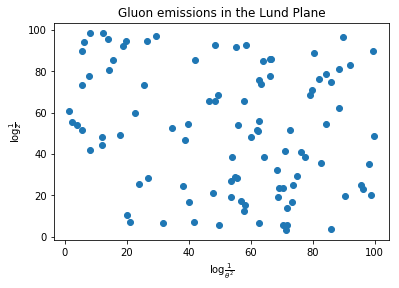

In [2]:
# Generate uniformly distributed variables on the quarter plane
x = np.random.uniform(0,100,100)
y = np.random.uniform(0,100,100)
# Question: is this actually uniformly distributed in both x and y? 

# Plot 
plt.scatter(x,y)
plt.title("Gluon emissions in the Lund Plane")
plt.xlabel(r"$\log \frac{1}{\theta^2}$")
plt.ylabel(r"$\log \frac{1}{z}$");

Now we are going to check which is the dominating emission by finding the one with the smallest value of:
$$ \log \frac{1}{\tau} =  \log \frac{1}{z}+ \log\frac{1}{\theta^2} $$

Which also can be written as: 
$$ \log \tau =  \log z+\log \theta^2 $$

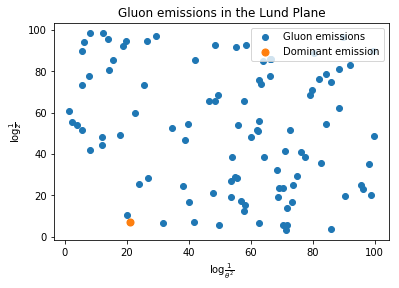

In [3]:
# Pick out the dominant emission
tau = np.where(x+y == min(x+y))

# Plot 
plt.scatter(x,y, label="Gluon emissions")
plt.scatter(x[tau],y[tau],s=50, label="Dominant emission")
plt.title("Gluon emissions in the Lund Plane")
plt.legend(loc="upper right")
plt.xlabel(r"$\log \frac{1}{\theta^2}$")
plt.ylabel(r"$\log \frac{1}{z}$");

From the above plot we can see that there will be one emission with a very high opening angle and momentum fraction that will dominate. It will be in the lower left. Soft emissions are towards the top of the plot. Collinear emissions will be towards the right. 

To make the plot slightly more intuitive I have also plotted it on a non-log, non-inverted scale. Here were can see that the majority of emissions are going to be soft and colinear. 

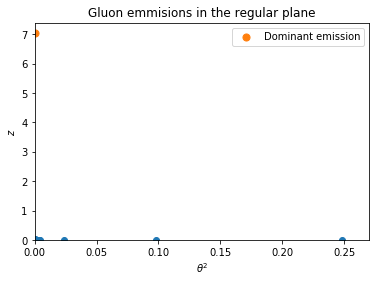

In [5]:
# Exponentiate and invert
x_0 = 1/np.exp(x)
y_0 = 1/np.exp(y)

# Plot
plt.figure()
plt.scatter(x_0,y_0)
plt.scatter(x_0[tau],y[tau],s=50, label="Dominant emission")
plt.title("Gluon emmisions in the regular plane")
plt.xlabel(r"$ \theta^2$")
plt.ylabel(r"$ z$")
plt.legend(loc="upper right")
plt.xlim(xmin=0)
plt.ylim(ymin=0);

Gluons appear to typically be emitted in the very soft and collinear regime. 

### Exponential function 

$$ P(x<\tau) = \exp \big[~\frac{-\alpha_s}{\pi}~\frac{C_F}{2}~\log^2\tau~\big]$$

In [6]:
# Define P(x<tau)
t = np.logspace(-4,0,1000)
p_x_g_t = np.exp(-a_s*c_f/(math.pi*2)*np.power(np.log(t),2)) 

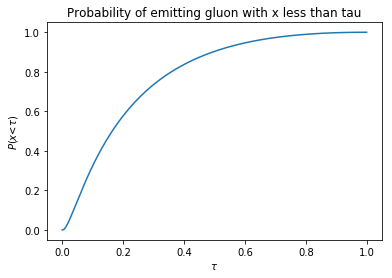

In [7]:
# Plot cumulative distribution function
plt.plot(t,p_x_g_t)
plt.ylabel(r"$P(x \less \tau)$")
plt.xlabel(r"$\tau$")
plt.title("Probability of emitting gluon with x less than tau");

When tau is large 
Interpretation: high probability of already having emitted a gluon with x<tau

Differentiate the cumulative dist to get p($\tau$)

$$ p(\tau) = - \frac{\alpha_s C_F}{\pi} \frac{\log \tau}{\tau} \exp \big[-\frac{\alpha_s}{\pi}~\frac{C_F}{2}\log^2 \tau \big] $$

In [8]:
# Define probability density function 
p_t = (np.exp(-a_s*c_f/(math.pi*2)*np.power(np.log(t),2)))*-1.0*a_s*c_f/math.pi*np.log(t)/t

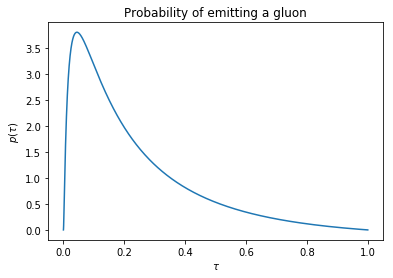

In [9]:
# Plot
plt.plot(t,p_t)
plt.ylabel(r"$p(\tau)$")
plt.xlabel(r"$\tau$")
plt.title("Probability of emitting a gluon");

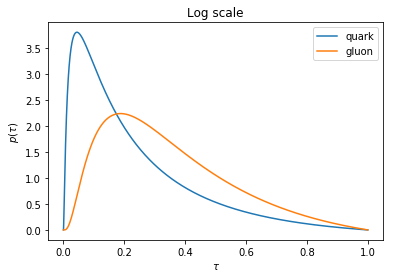

In [10]:
# Plot pdfs for both emission of a gluon from quark jets and gluon jets
p_t_q = (np.exp(-a_s*c_f/(math.pi*2)*np.power(np.log(t),2)))*-1.0*a_s*c_f/math.pi*np.log(t)/t
p_t_g = (np.exp(-a_s*c_a/(math.pi*2)*np.power(np.log(t),2)))*-1.0*a_s*c_a/math.pi*np.log(t)/t #uses c_a

# Plot
plt.plot(t,p_t_q,label="quark")
plt.plot(t,p_t_g,label="gluon")
plt.ylabel(r"$p(\tau)$")
plt.legend()
plt.title("Log scale")
plt.xlabel(r"$\tau$");
#plt.xscale("log");


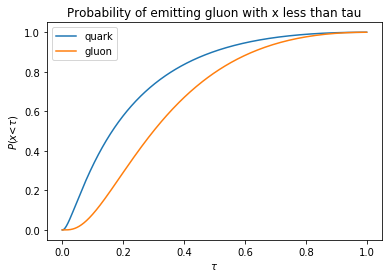

In [11]:
# Plot the cdfs
p_x_g_t_q = np.exp(-a_s*c_f/(math.pi*2)*np.power(np.log(t),2)) 
p_x_g_t_g = np.power(np.exp(-a_s*c_f/(math.pi*2)*np.power(np.log(t),2)),c_a/c_f)   
plt.plot(t,p_x_g_t_q,label="quark")
plt.plot(t,p_x_g_t_g,label="gluon")
plt.ylabel(r"$P(x \less \tau)$")
plt.xlabel(r"$\tau$")
plt.legend()
plt.title("Probability of emitting gluon with x less than tau");

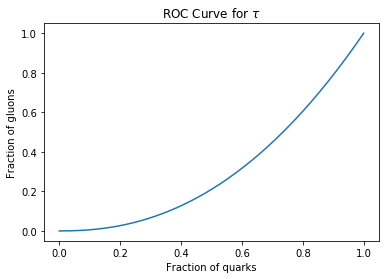

In [12]:
# Calculate fraction of quarks and gluons at each tau
x = []
y = []
for tau in range(len(t)): 
    x.append(p_x_g_t_q[tau])
    y.append(p_x_g_t_g[tau])
    
# Plot ROC curve
plt.plot(x,y)    
plt.title(r"ROC Curve for $\tau$")
plt.xlabel("Fraction of quarks")
plt.ylabel("Fraction of gluons");